#1) Confusion Matrix

##1a) Confusion Matrix Numbers

In [1]:
from sklearn.metrics import confusion_matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

##1b) Plotting Confusion Matrix

In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_true, y_pred)

###b(i)Simple Matrix Plot

Text(50.722222222222214, 0.5, 'y_true')

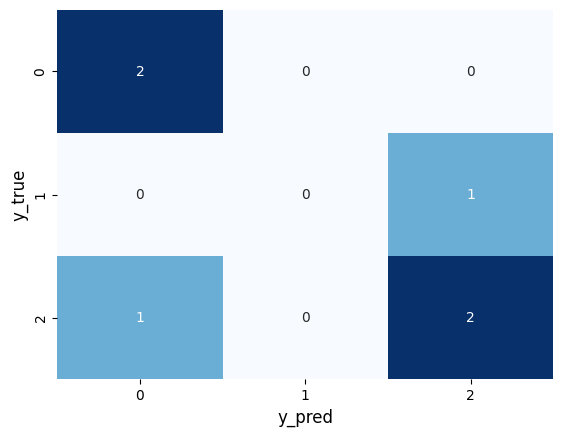

In [3]:
import matplotlib.pyplot as plt

sns.heatmap(cf_matrix, cbar=False, annot=True, cmap='Blues')
plt.xlabel('y_pred', fontsize=12)
plt.ylabel('y_true', fontsize=12)

###b(ii)Advanced Matrix Plot

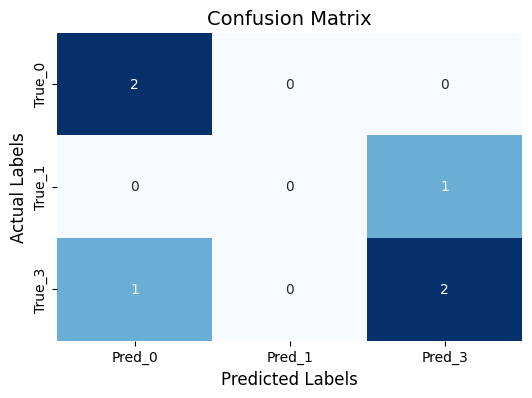

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cf_matrix, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

# Set the axes labels and the title
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['Pred_0', 'Pred_1', 'Pred_3'])
ax.yaxis.set_ticklabels(['True_0', 'True_1', 'True_3'])

# Display the plot
plt.show()



---



#2) Accuracy

In [5]:
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

accuracy_score(y_true, y_pred)

#50% accuracy! not bad!

0.5



---



#3) Precision

In [6]:
import numpy as np
from sklearn.metrics import precision_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

precision_score(y_true, y_pred, average = None)

#average is a compulsory input
#by default, we use average = None
#the precision is 67% for Class 0

array([0.66666667, 0.        , 0.        ])



---



#4) Recall / Sensitivity

In [7]:
import numpy as np
from sklearn.metrics import recall_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

recall_score(y_true, y_pred, average=None)

#average is a compulsory input
#by default, we use average = None
#the Sensitivity is 100% for Class 0

array([1., 0., 0.])



---



#5) Specificity

- **Note that there are NO SPECIFICITY functions / codes in Scikit Learn!!!
- in other words, it is unimportant to obtain it....



---



#6) F1 Score

In [8]:
import numpy as np
from sklearn.metrics import f1_score

y_true = [0, 1, 2, 0, 1, 2]
y_pred = [0, 2, 1, 0, 0, 1]

f1_score(y_true, y_pred, average=None)

#average is a compulsory input
#by default, we use average = None
#the F1 score is 100% for Class 0

array([0.8, 0. , 0. ])



---



#7) ROC / AUC

##7a) Pip install Scikit Plot

In [9]:
!pip install scikit-plot

##7b) Import Libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import scikitplot as skplt

##7c) Let X be features and y be target

In [11]:
url = "https://www.alvinang.sg/s/iris_dataset.csv"
df = pd.read_csv(url)

X = df.iloc[:, :4]
y = df.iloc[:, -1]

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

##7c) Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##7d) Train using Logistic Regression

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

##7e) Display the Probabilities of each class

In [16]:
y_probs = model.predict_proba(X_test)
y_probs

array([[3.76999128e-03, 8.26991107e-01, 1.69238901e-01],
       [9.47168180e-01, 5.28316219e-02, 1.98569166e-07],
       [8.51234989e-09, 1.55774792e-03, 9.98442244e-01],
       [6.37776663e-03, 7.92129527e-01, 2.01492706e-01],
       [1.43125913e-03, 7.74090277e-01, 2.24478464e-01],
       [9.56314944e-01, 4.36848810e-02, 1.75059237e-07],
       [7.74305796e-02, 9.08248884e-01, 1.43205361e-02],
       [1.57778826e-04, 1.56032670e-01, 8.43809551e-01],
       [2.20682769e-03, 7.62268894e-01, 2.35524279e-01],
       [2.83284884e-02, 9.45734672e-01, 2.59368392e-02],
       [4.30789279e-04, 2.43710135e-01, 7.55859076e-01],
       [9.68989293e-01, 3.10106301e-02, 7.67210635e-08],
       [9.73342871e-01, 2.66570962e-02, 3.29197375e-08],
       [9.62849031e-01, 3.71508598e-02, 1.09159279e-07],
       [9.79453355e-01, 2.05465810e-02, 6.42308967e-08],
       [4.47250742e-03, 7.12948681e-01, 2.82578812e-01],
       [7.06062697e-06, 2.42600615e-02, 9.75732878e-01],
       [2.74446181e-02, 9.47508

##7f) Plotting the ROC curve

In [17]:
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')

#'ovr' (One-vs-Rest) - Default for multi-class problems:
#This strategy treats each class as the positive class
#and all other classes as the negative class.

#It creates multiple binary classification problems,
#and the ROC AUC score is calculated separately for each class.
#The final ROC AUC score for the multiclass problem is the average of the ROC AUC scores
#for all classes.

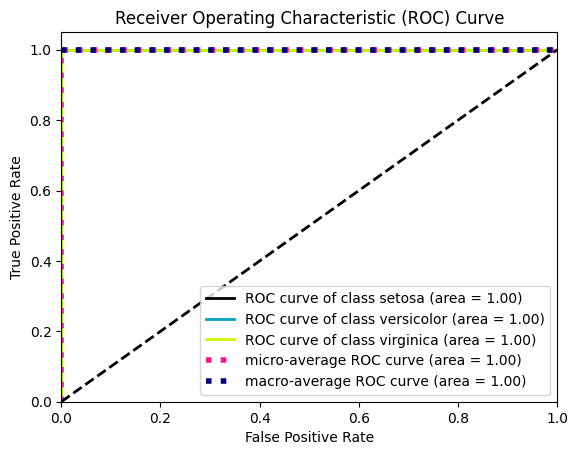

In [18]:
skplt.metrics.plot_roc(y_test, y_probs)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

#note that the AUC is shown on the plot
#the AREA for all classes are 1, meaning to say Logistic Regression
#is a PERFECT classifier
#and the ROC is MAXED out



---



#8) PR Curve

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

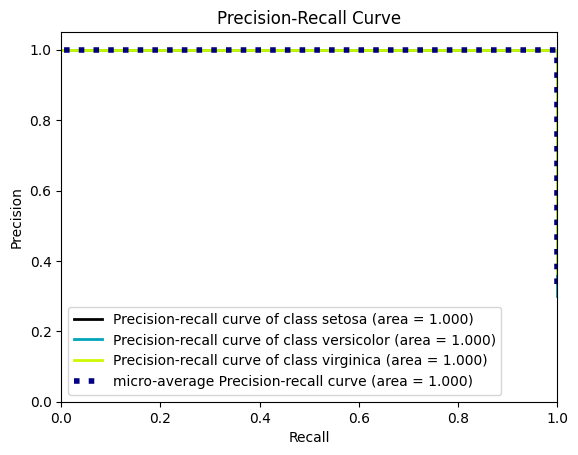

In [19]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load the CSV file into a DataFrame and extract features (X) and target (y)
url = "https://www.alvinang.sg/s/iris_dataset.csv"
df = pd.read_csv(url)

X = df.iloc[:, :4]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate predicted probabilities for the test set
y_probs = model.predict_proba(X_test)

# Plot the Precision-Recall curve
skplt.metrics.plot_precision_recall_curve(y_test, y_probs)




---



#9) Classification Report

In [20]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

#Accuracy = 60%
#Precision per class = 50% / 0% / 100%
#Recall per class = 100% / 0% / 67%
#F1-score per class = 67% / 0% / 80%

              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5





---
#THE END


---


